In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
import tensorflow as tf

train_scaled = np.load('./train_img.npy') #넘파이 불러오기 train_img
train_target = np.load('./train_emo.npy') #넘파이 불러오기 train_emo
test_scaled = np.load('./test_img.npy') #넘파이 불러오기 test_img
test_target = np.load('./test_emo.npy') #넘파이 불러오기 test_emo

classes = ['haapy ', 'surprise', 'neutral', 'fear', 'disgust', 'anger', 'sad']

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(180,180,3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               12960100  
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(test_scaled, test_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
533/533 [==============================] - 271s 508ms/step - loss: 1.9061 - accuracy: 0.2543 - val_loss: 2.1104 - val_accuracy: 0.1405
Epoch 2/20
533/533 [==============================] - 299s 561ms/step - loss: 1.2451 - accuracy: 0.5415 - val_loss: 2.3365 - val_accuracy: 0.1462
Epoch 3/20
533/533 [==============================] - 961s 2s/step - loss: 0.8714 - accuracy: 0.6795 - val_loss: 2.8313 - val_accuracy: 0.1535


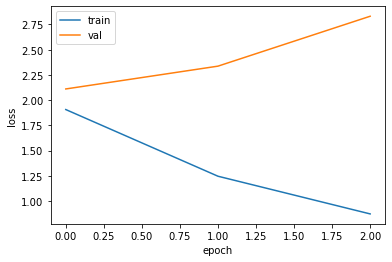

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model.evaluate(test_scaled, test_target)

159/159 [==============================] - 20s 125ms/step - loss: 2.1104 - accuracy: 0.1405


[2.110395669937134, 0.14048607647418976]

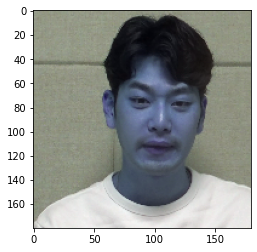

In [9]:
plt.imshow(test_scaled[0].reshape(180, 180,3))
plt.show()

In [10]:
preds = model.predict(test_scaled[0:1])
print(preds)

[[0.13307613 0.0925906  0.18976963 0.21800467 0.12415619 0.18494697
  0.0483234  0.00233295 0.00299441 0.00380521]]


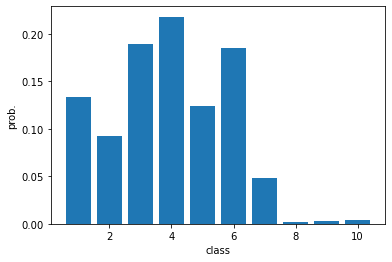

In [11]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [12]:
classes = ['haapy ', 'surprise', 'neutral', 'fear', 'disgust', 'anger', 'sad']

In [13]:
print(classes[np.argmax(preds)])

fear


In [14]:
model.evaluate(test_scaled, test_target)

159/159 [==============================] - 18s 114ms/step - loss: 2.1104 - accuracy: 0.1405


[2.110395669937134, 0.14048607647418976]